# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Hsinchu, Hsinchu, Taiwan**, or **Taiwan** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Hsinchu, Hsinchu, Taiwan** to Ann Arbor, USA. In that case at least one source file must be about **Hsinchu, Hsinchu, Taiwan**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Hsinchu, Hsinchu, Taiwan** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt %matplotlib inline

In [2]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [3]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

def get_list_of_university_towns():
    """
    Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )

    The following cleaning needs to be done:
    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. 
    """
    df = pd.read_table("https://storage.googleapis.com/um_ds_intro/university_towns.txt", header=None)
    df.columns = ['StateRegion']
    df['StateFlag'] = df['StateRegion'].str.contains(pat=r'\[edit\]')
    df_states = df[df['StateFlag'] == True]
    # Find out state name
    States = df_states['StateRegion'].str.replace(pat=r'\[edit\]', repl='').unique()
    StateFlags = df['StateFlag'].values
    j = 0
    StateMatchRegion = [States[j]]
    # Seperate state and region
    for i in range(1, len(StateFlags)):
        if StateFlags[i] == True:
            j += 1
            StateMatchRegion.append(States[j])
        else:
            j += 0
            StateMatchRegion.append(States[j])
    # Clean data
    df['StateMatchRegion'] = StateMatchRegion
    df['RegionName'] = df['StateRegion'].str.replace(pat=r'\s\(.*', repl='')
    ans = df[df['StateFlag'] == False]
    ans = ans.drop(['StateRegion', 'StateFlag'], axis=1)
    ans.columns = ['State', 'RegionName']
    mapping_df = pd.DataFrame({
    "State": list(states.values()),
    "StateAcronyms": list(states.keys())
    })
    ans = pd.merge(ans, mapping_df, how='left')
    return ans

get_list_of_university_towns()

,State,RegionName,StateAcronyms
0,Alabama,Auburn,AL
1,Alabama,Florence,AL
2,Alabama,Jacksonville,AL
3,Alabama,Livingston,AL
4,Alabama,Montevallo,AL
5,Alabama,Troy,AL
6,Alabama,Tuscaloosa,AL
7,Alabama,Tuskegee,AL
8,Alaska,Fairbanks,AK
9,Arizona,Flagstaff,AZ


In [4]:
 def convert_housing_data_to_quarters(): 
    df = pd.read_csv('https://storage.googleapis.com/um_ds_intro/City_Zhvi_AllHomes.csv')
    df_state_region = df.loc[:, ['State', 'RegionName']]
    # Choose house price latter than 2000-01
    df_housing_price = df.loc[:, '2000-01':]
   
    df_concat = pd.concat([df_state_region, df_housing_price], axis = 1)
    ans = df_concat.set_index(['State', 'RegionName'])
  
    return ans
convert_housing_data_to_quarters()

,,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
State,RegionName,,,,,,,,,,,,,,,,,,,,,
NY,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
CA,Los Angeles,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,222800.0,224300.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
IL,Chicago,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,149000.0,150400.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
PA,Philadelphia,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,54500.0,54700.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
AZ,Phoenix,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,116500.0,117200.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
NV,Las Vegas,131700.0,132600.0,133500.0,134100.0,134400.0,134600.0,134800.0,135400.0,136000.0,136400.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
CA,San Diego,219200.0,222900.0,226600.0,230200.0,234400.0,238500.0,242000.0,245300.0,249000.0,252500.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
TX,Dallas,85100.0,84500.0,83800.0,83600.0,83800.0,84200.0,84500.0,84900.0,85200.0,86000.0,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
CA,San Jose,364100.0,374000.0,384700.0,395700.0,407100.0,416900.0,424700.0,431700.0,439200.0,447600.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700


In [5]:
housing_data_quarters = convert_housing_data_to_quarters()
quarters = housing_data_quarters.columns
new_data = housing_data_quarters.reset_index()

# Choose university town
university_towns = get_list_of_university_towns().drop('State', axis=1)
new_data = pd.merge(new_data, university_towns, how='left', left_on = ['State', 'RegionName'], right_on = ['StateAcronyms', 'RegionName'])
new_data = new_data.assign(is_university_town = [True if isinstance(x, str) else False for x in new_data['StateAcronyms'].values])
new_data = new_data.drop('StateAcronyms', axis=1)

In [43]:
# Calculate the averange housing price of university town
Is_uni_town = new_data[new_data['is_university_town'] == True].mean()
Is_uni = pd.Series(Is_uni_town)
Is_uni = Is_uni.reset_index()
Is_uni.columns = ['Quarter', 'Mean']

# Calculate the averange housing price of none university town
Not_uni_town = new_data[new_data['is_university_town'] == False].mean()
Not_uni = pd.Series(Not_uni_town)
Not_uni = Not_uni.reset_index()
Not_uni.columns = ['Quarter', 'Mean']
Is_uni = Is_uni.loc[0:191, :]
Not_uni = Not_uni.loc[0:191, :]
Is_uni

,Quarter,Mean
0,2000-01,128306.504065
1,2000-02,129459.109312
2,2000-03,130508.097166
3,2000-04,131488.663968
4,2000-05,132466.396761
5,2000-06,133497.165992
6,2000-07,134568.016194
7,2000-08,135582.591093
8,2000-09,136551.012146
9,2000-10,137539.271255


In [41]:
#Change index to annaul
year_means = []
for y in range(0, 192, 12):
    df_subset = Not_uni.iloc[y:y+11, 1]
    year_mean = df_subset.mean()
    year_means.append(year_mean)
year = np.arange(2000, 2016, 1) 
Not_uni_df = pd.DataFrame(year_means)
Not_uni_df = Not_uni_df.set_index(year)
Not_uni_df

,0
2000,151296.809739
2001,164805.508741
2002,177669.250560
2003,194727.017797
2004,215942.717370
2005,243407.444797
2006,259195.703066
2007,256949.255213
2008,241025.499335
2009,222904.385658


In [44]:
#Change index to annaul
Uni_year_means = []
for y in range(0, 192, 12):
    df_subset = Is_uni.iloc[y:y+11, 1]
    year_mean = df_subset.mean()
    Uni_year_means.append(year_mean)
year = np.arange(2000, 2016, 1) 
Is_uni_df = pd.DataFrame(Uni_year_means)
Is_uni_df = Is_uni_df.set_index(year)
Is_uni_df

,0
2000,133500.370447
2001,144611.466575
2002,155152.712610
2003,168429.216004
2004,186243.713477
2005,207462.656613
2006,220723.629289
2007,219843.296781
2008,208365.602318
2009,196105.078315


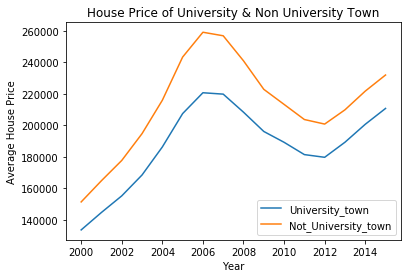

In [45]:
#Plot the housing price correlation chart between university and none university town
fig = plt.figure()
ax = plt.axes()

ax.plot(Is_uni_df[0], label = 'University_town')
ax.plot(Not_uni_df[0], label = 'Not_University_town')

ax.legend(loc = 'lower right')
ax.set_title('House Price of University & Non University Town')
ax.set_ylabel('Average House Price')
ax.set_xlabel('Year')

plt.show()